# Plotting

In [1]:
# Imports
from music21.pitch import Pitch
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')
from alamire import solmize, get_gamut, Solmization
from alamire.parse_graph import ParseGraph
from alamire.gamut_graph import HexachordGraph

## Hexachord graph

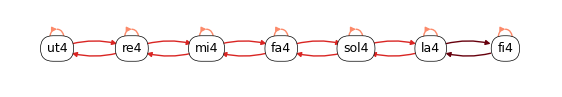

In [2]:
H = HexachordGraph('G3')
H.draw()

## Gamut graph

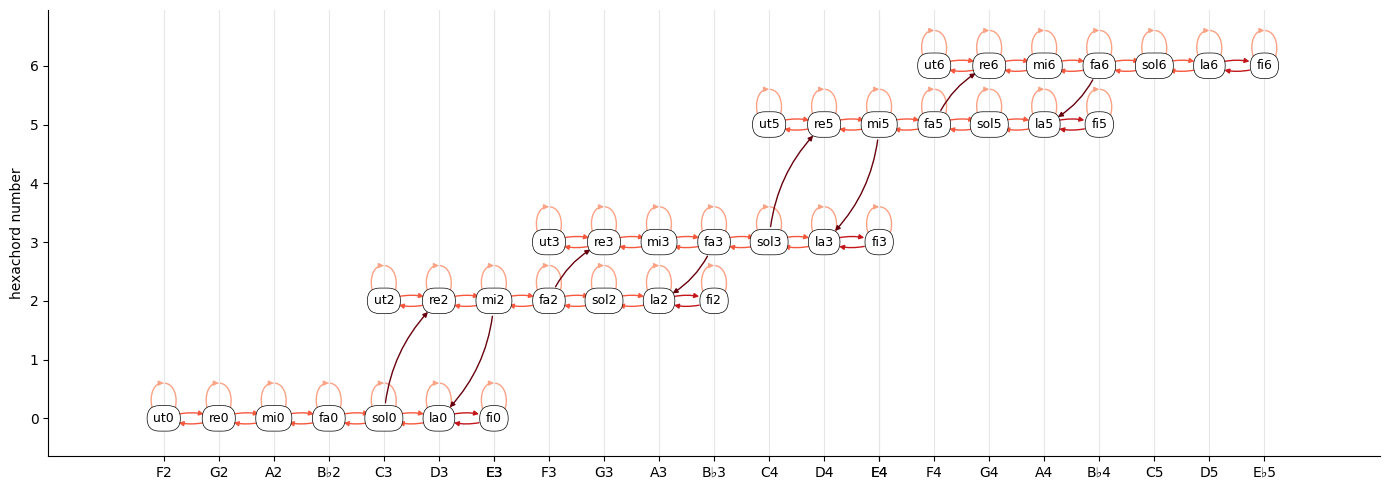

In [3]:
get_gamut('soft-continental').draw(show_loops=True)
plt.tight_layout()
# plt.savefig('../figures/soft-gamut-graph.png')


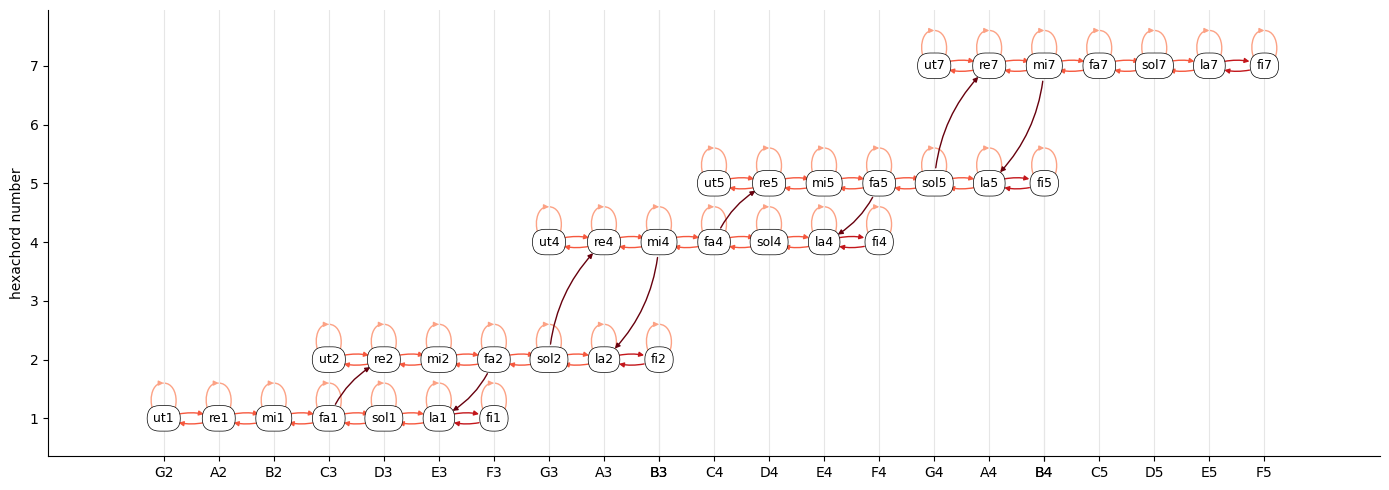

In [4]:
get_gamut('hard-continental').draw(show_loops=True)
plt.tight_layout()
# plt.savefig('../figures/soft-gamut-graph.png')


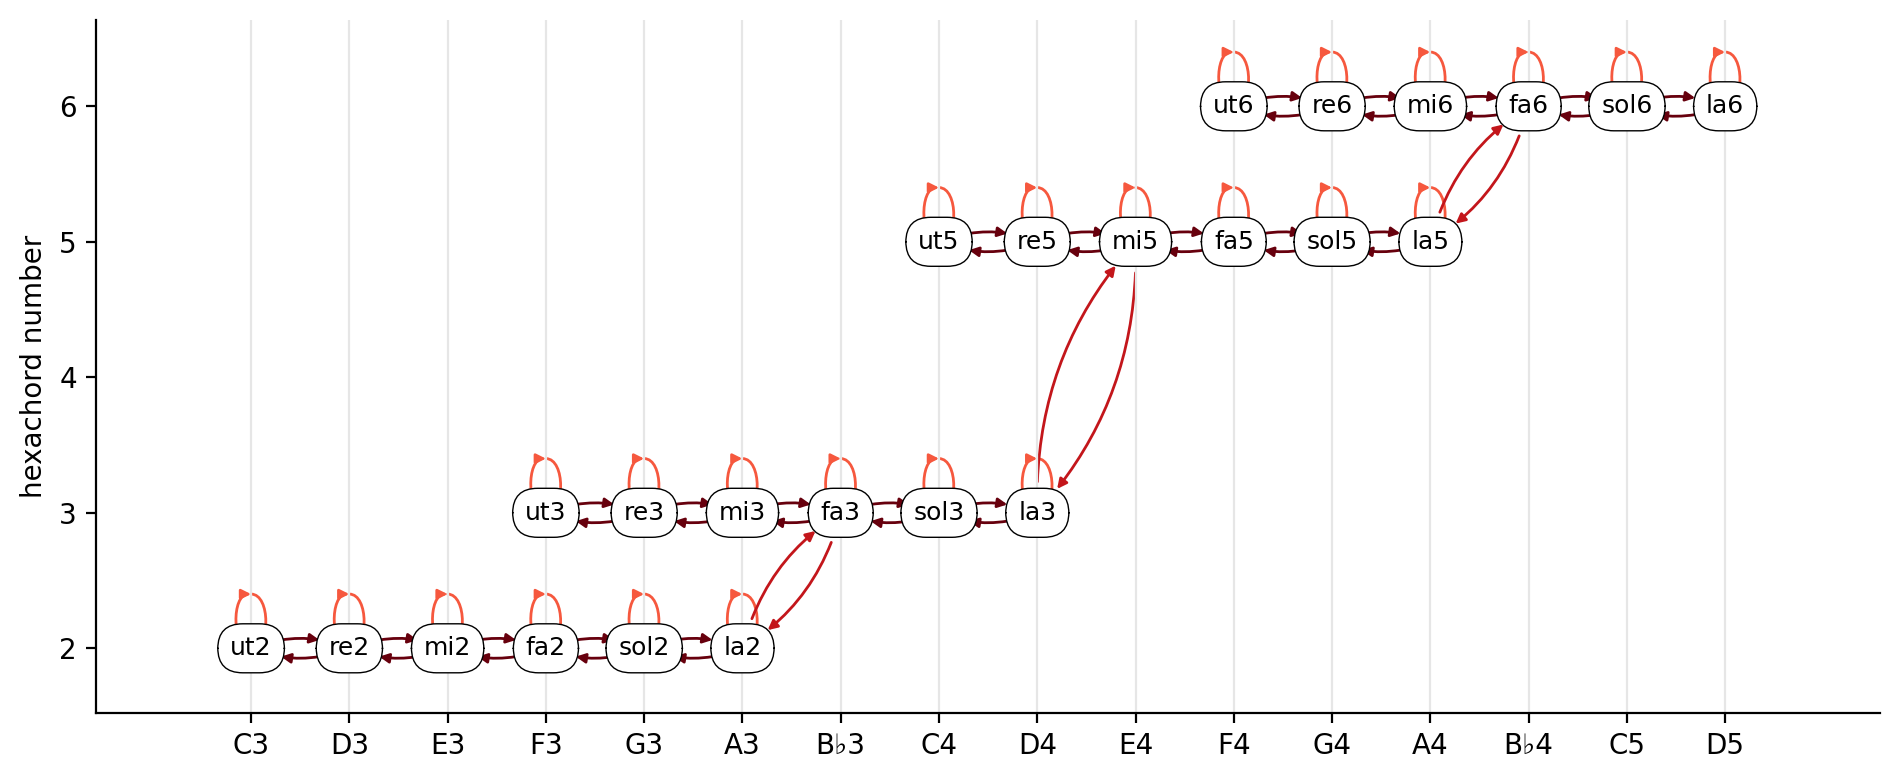

In [5]:
gamut = get_gamut('soft-english')
gamut.draw(show_loops=True)
plt.tight_layout()
# plt.savefig('../figures/soft-english-gamut.png')

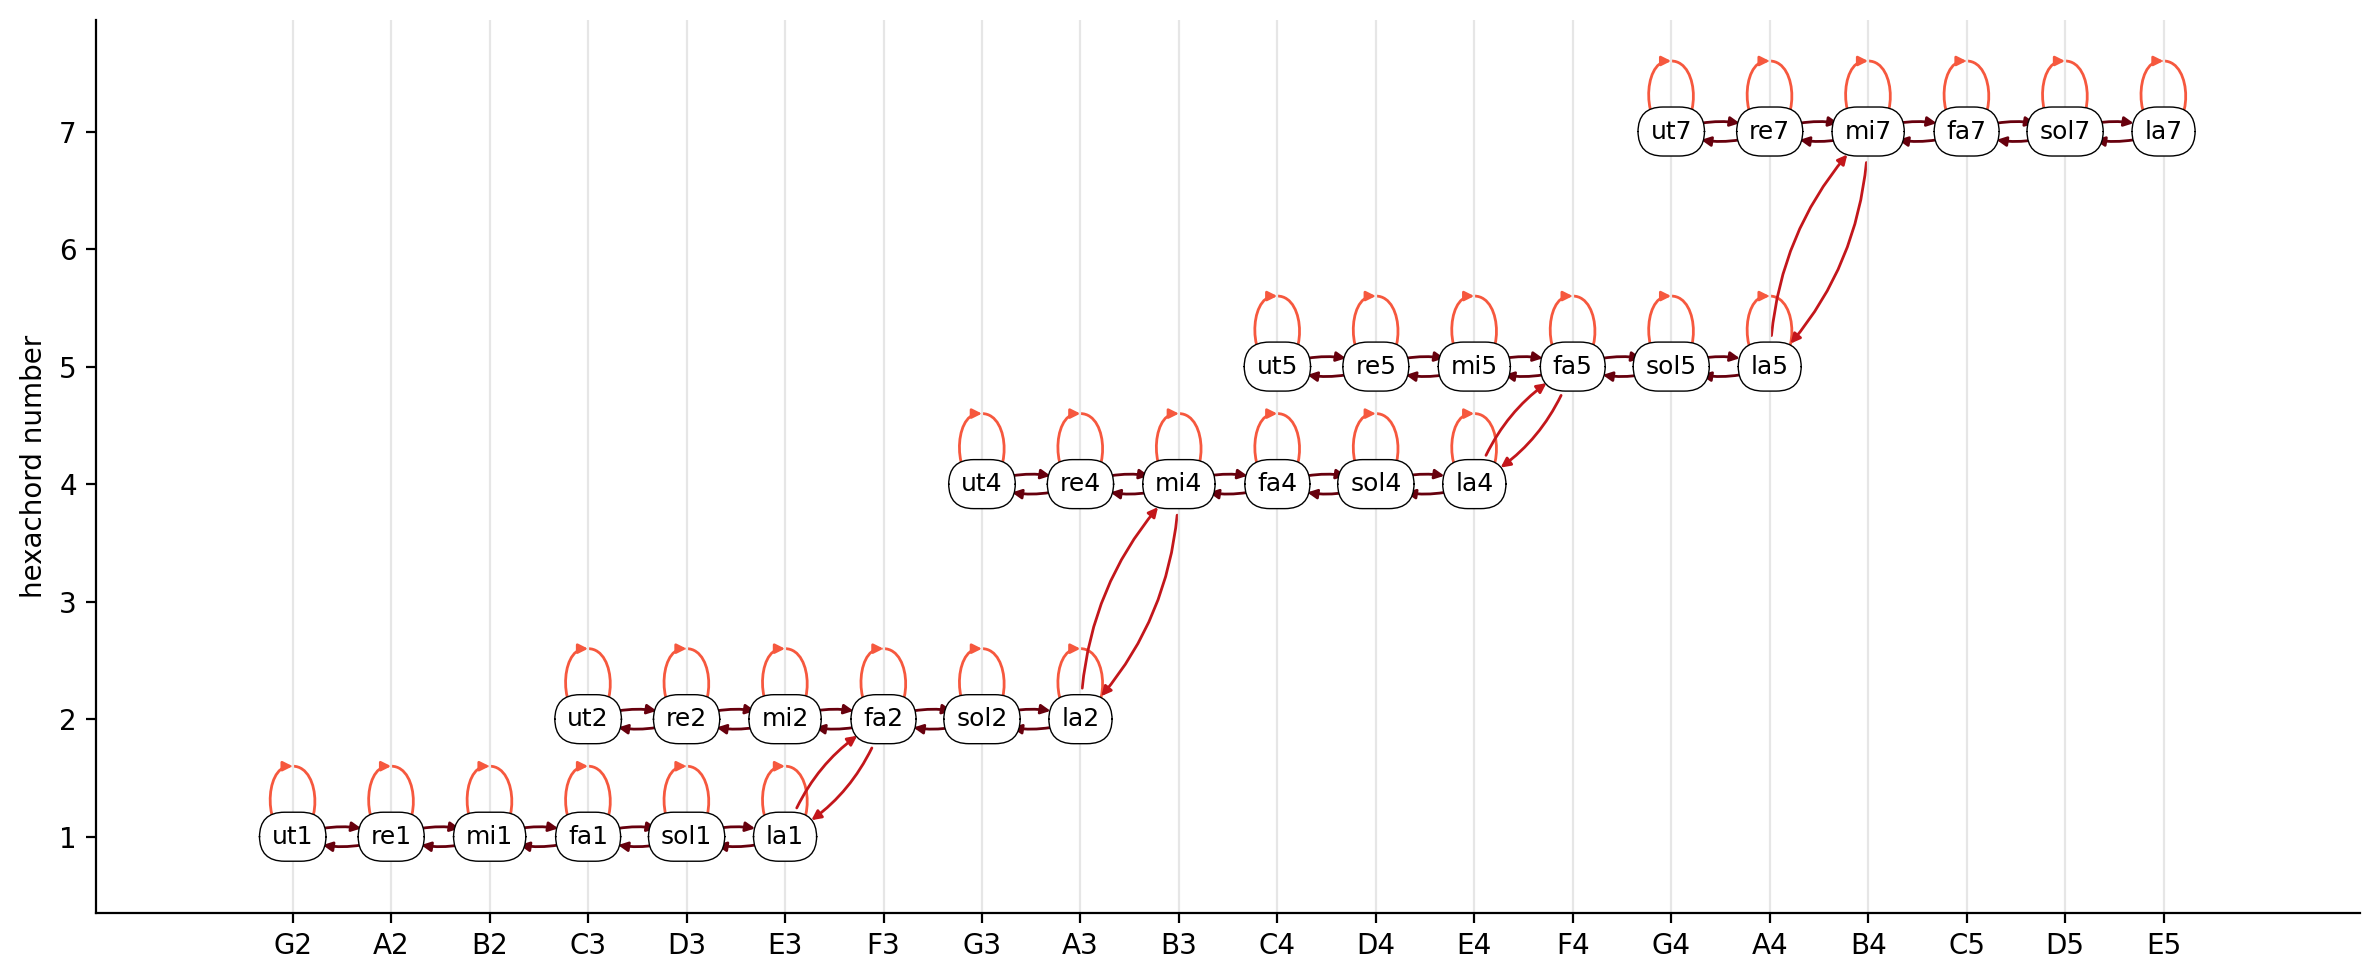

In [6]:
gamut = get_gamut('hard-english')
gamut.draw(show_loops=True)
plt.tight_layout()
# plt.savefig('../figures/soft-english-gamut.png')

In [7]:
hard_gamut_params = {
    # Hard up to natural and back
    "hard_up_nat_mi_ut": ("hard", "up", "natural", 3, 1),
    "hard_up_nat_fa_re": ("hard", "up", "natural", 4, 2),
    "hard_up_nat_sol_mi": ("hard", "up", "natural", 5, 3),
    "hard_up_nat_la_fa": ("hard", "up", "natural", 6, 4),
    "nat_down_hard_ut_mi": ("natural", "down", "hard", 1, 3),
    "nat_down_hard_re_fa": ("natural", "down", "hard", 2, 4),
    "nat_down_hard_mi_sol": ("natural", "down", "hard", 3, 5),
    "nat_down_hard_fa_la": ("natural", "down", "hard", 4, 6),
    # Steps down in pitch, but up in hexachord
    "hard_up_nat_sol_ut": ("hard", "up", "natural", 5, 1),
    "hard_up_nat_la_re": ("hard", "up", "natural", 6, 2),
    "nat_down_hard_ut_sol": ("natural", "down", "hard", 1, 5),
    "nat_down_hard_re_la": ("natural", "down", "hard", 2, 6),
    
    # Hard down to natural and back
    "hard_down_nat_ut_fa": ("hard", "down", "natural", 1, 4),
    "hard_down_nat_re_sol": ("hard", "down", "natural", 2, 5),
    "hard_down_nat_mi_la": ("hard", "down", "natural", 3, 6),
    "nat_up_hard_fa_ut": ("natural", "up", "hard", 4, 1),
    "nat_up_hard_sol_re": ("natural", "up", "hard", 5, 2),
    "nat_up_hard_la_mi": ("natural", "up", "hard", 6, 3),
    # Steps up in pitch, but down in hexachord
    "hard_down_nat_ut_la": ("hard", "down", "natural", 1, 6),
    "nat_up_hard_la_ut": ("natural", "up", "hard", 6, 1),
}

## Parse graph

Let's parse a hexachord graph, not a graph we really need to parse in the end, but still.

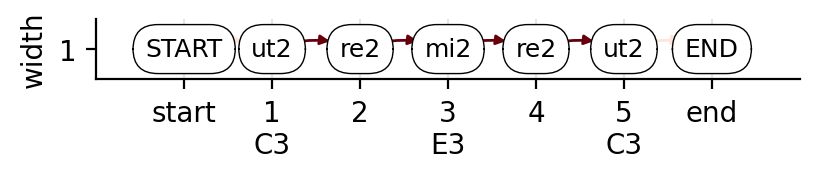

In [8]:
H = HexachordGraph("C3")
seq = [Pitch(p) for p in "C3 E3 C3".split(" ")]
match_fn = lambda node, target: node == target
parse = ParseGraph(H, seq, match_fn=match_fn)
parse.draw()

Here we see the effect of pruning the parse graph. Here is the parse graph without pruning:

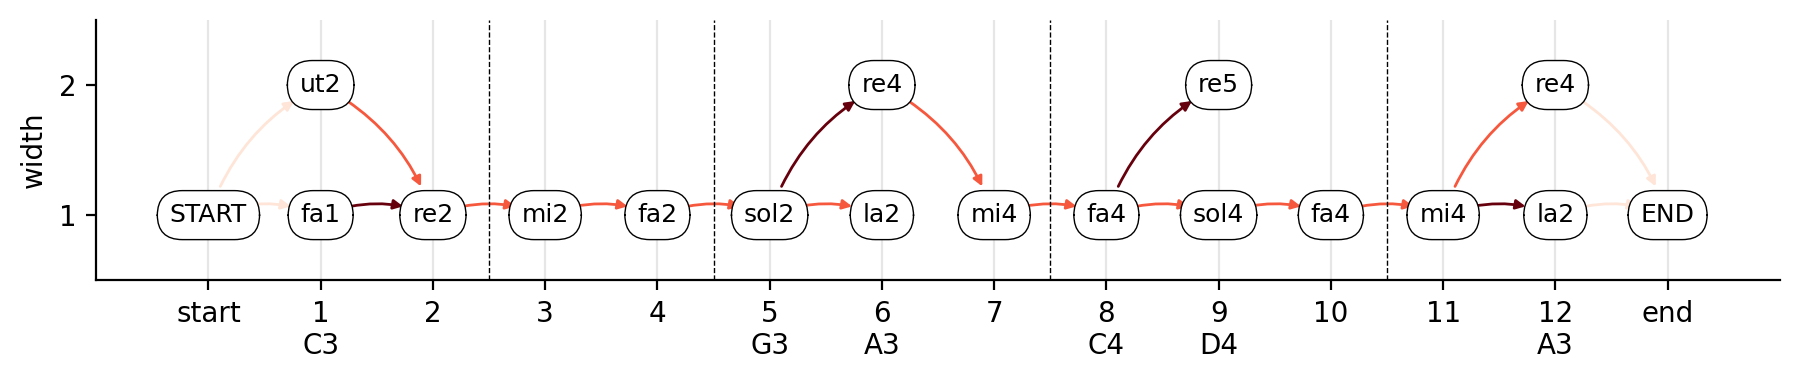

In [11]:
Solmization('C3 G3 A3 C4 D4 A3'.split(' '), gamut='hard-continental', prune_parse=False).parse.draw()

And here the same parse graph, but now with pruning

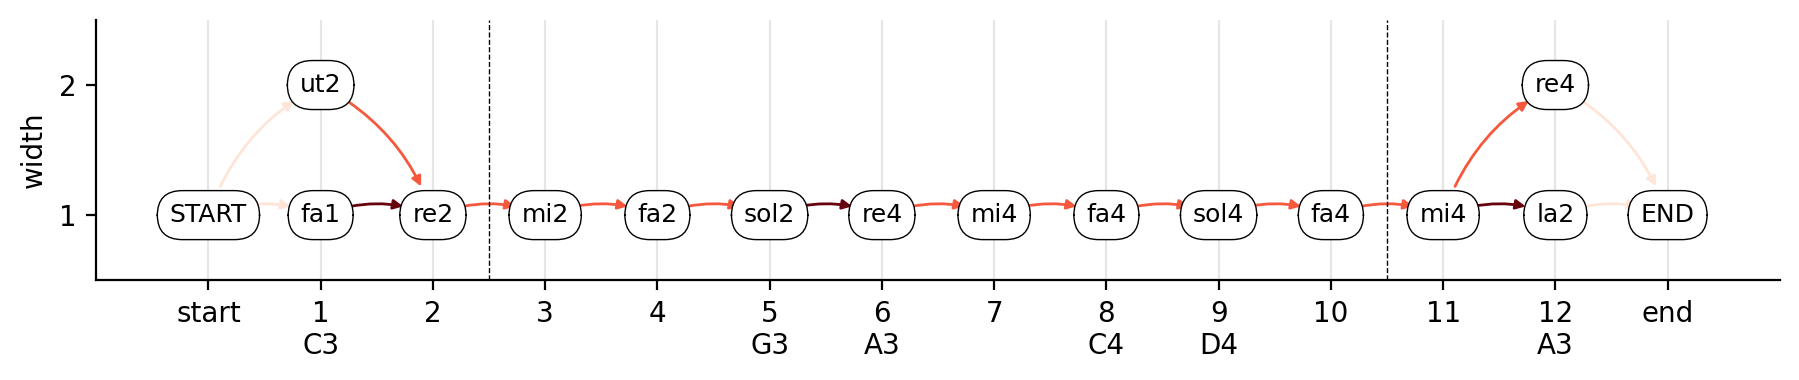

In [13]:
Solmization('C3 G3 A3 C4 D4 A3'.split(' '), gamut='hard-continental').parse.draw()

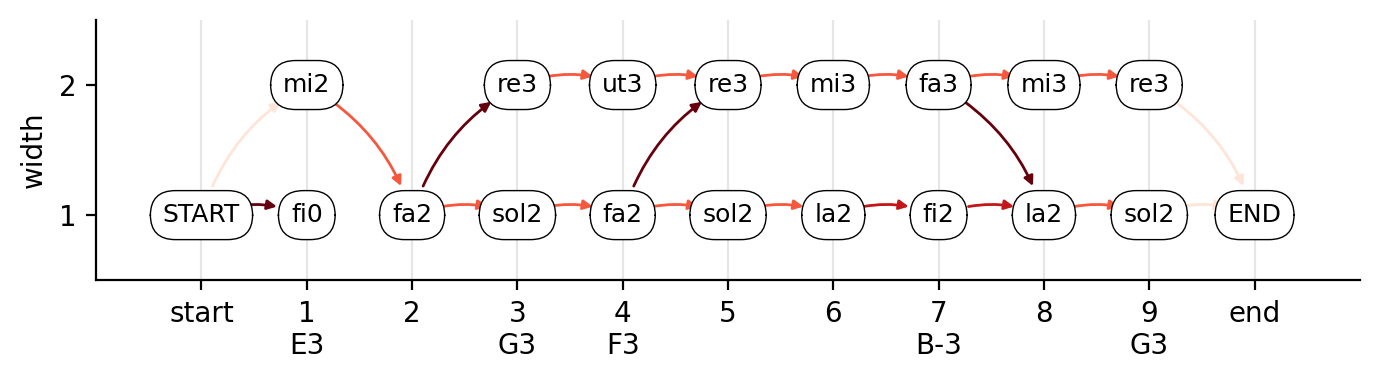

In [15]:
Solmization('E3 G3 F3 B-3 G3'.split(' '), gamut='soft-continental', prune_parse=False).parse.draw()
plt.tight_layout()
# plt.savefig('../figures/parse-graph.png')


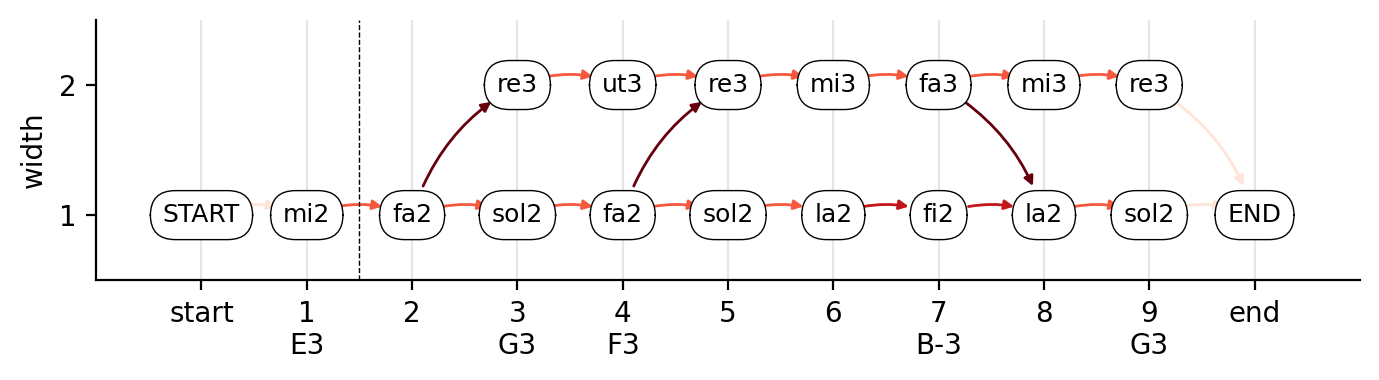

In [16]:
Solmization('E3 G3 F3 B-3 G3'.split(' '), gamut='soft-continental').parse.draw()
# plt.savefig('../figures/parse-graph.png')


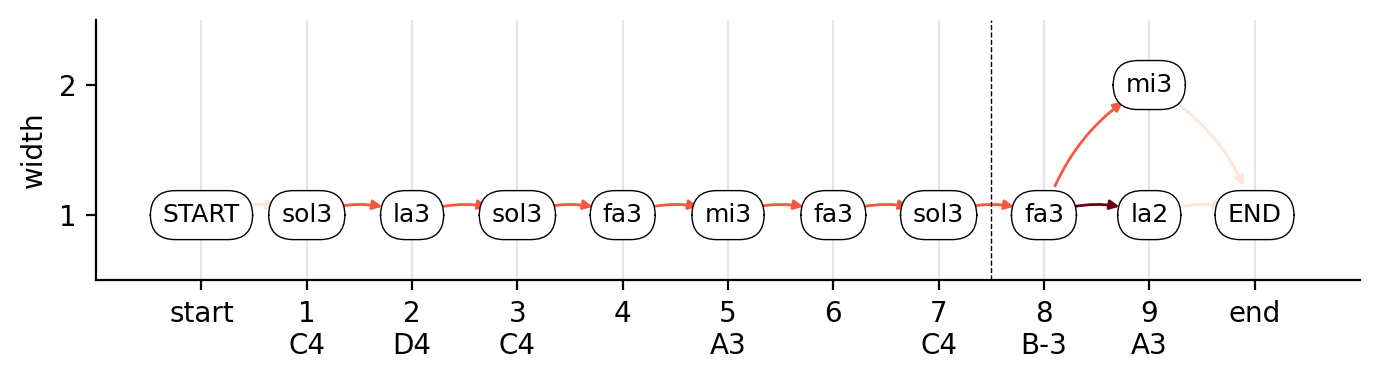

In [17]:
from music21 import converter
CORPUS_DIR = '/Users/bas/surfdrive/Research/Guidonian Hand/Corpus'
MdB_DIR = f'{CORPUS_DIR}/Marot & de Bèze'
fn = f'{MdB_DIR}/musicxml/MdB001.musicxml'
score = converter.parse(fn)
sol = solmize(score.measures(1, 3), style='continental')
sol.parse.draw()

## Connected Gamut

In [18]:
from alamire.gamut_graph import GamutGraph

In [19]:
kws = dict()
hexachords = [
    HexachordGraph("G2", **kws),
    HexachordGraph("C3", **kws),
    HexachordGraph("G3", **kws),
    HexachordGraph("C4", **kws),
    HexachordGraph("G4", **kws),
]
gamut = GamutGraph(hexachords)

In [20]:
hard_gamut_params = {
    # Hard up to natural and back
    "hard_up_nat_fa_ut": ("hard", "up", "natural", 4, 1),
    "hard_up_nat_sol_re": ("hard", "up", "natural", 5, 2),
    "hard_up_nat_la_mi": ("hard", "up", "natural", 6, 3),
    "hard_up_nat_fi_fa": ("hard", "up", "natural", 7, 4),
    "nat_down_hard_ut_fa": ("natural", "down", "hard", 1, 4),
    "nat_down_hard_re_sol": ("natural", "down", "hard", 2, 5),
    "nat_down_hard_mi_la": ("natural", "down", "hard", 3, 6),
    "nat_down_hard_fa_fi": ("natural", "down", "hard", 4, 7),
    
    # Hard down to natural and back
    "hard_down_nat_ut_sol": ("hard", "down", "natural", 1, 5),
    "hard_down_nat_re_la": ("hard", "down", "natural", 2, 6),
    "hard_down_nat_mi_fi": ("hard", "down", "natural", 3, 7),
    "nat_up_hard_sol_ut": ("natural", "up", "hard", 5, 1),
    "nat_up_hard_la_re": ("natural", "up", "hard", 6, 2),
    "nat_up_hard_fi_mi": ("natural", "up", "hard", 7, 3)
}
hard_gamut_params_inv = {v: k for k, v in hard_gamut_params.items()}

soft_gamut_params = {
    # Soft up to natural and back
    "soft_up_nat_sol_ut": ("soft", "up", "natural", 5, 1),
    "soft_up_nat_la_re": ("soft", "up", "natural", 6, 2),
    "soft_up_nat_fi_mi": ("soft", "up", "natural", 7, 3),
    "nat_down_soft_ut_sol": ("natural", "down", "soft", 1, 5),
    "nat_down_soft_re_la": ("natural", "down", "soft", 2, 6),
    "nat_down_soft_mi_fi": ("natural", "down", "soft", 3, 7),

    # Soft down to natural and back
    "soft_down_nat_ut_fa": ("soft", "down", "natural", 1, 4),
    "soft_down_nat_re_sol": ("soft", "down", "natural", 2, 5),
    "soft_down_nat_mi_la": ("soft", "down", "natural", 3, 6),
    "soft_down_nat_fa_fi": ("soft", "down", "natural", 4, 7),
    "nat_up_soft_fa_ut": ("natural", "up", "soft", 4, 1),
    "nat_up_soft_sol_re": ("natural", "up", "soft", 5, 2),
    "nat_up_soft_la_mi": ("natural", "up", "soft", 6, 3),
    "nat_up_soft_fi_fa": ("natural", "up", "soft", 7, 4),
}
soft_gamut_params_inv = {v: k for k, v in soft_gamut_params.items()}

In [21]:
weights = np.arange(14)
weights = [1] * 14
weight_dict = dict(zip(soft_gamut_params.keys(), weights))
weight_dict

{'soft_up_nat_sol_ut': 1,
 'soft_up_nat_la_re': 1,
 'soft_up_nat_fi_mi': 1,
 'nat_down_soft_ut_sol': 1,
 'nat_down_soft_re_la': 1,
 'nat_down_soft_mi_fi': 1,
 'soft_down_nat_ut_fa': 1,
 'soft_down_nat_re_sol': 1,
 'soft_down_nat_mi_la': 1,
 'soft_down_nat_fa_fi': 1,
 'nat_up_soft_fa_ut': 1,
 'nat_up_soft_sol_re': 1,
 'nat_up_soft_la_mi': 1,
 'nat_up_soft_fi_fa': 1}

In [22]:
kws = dict()
hexachords = [
    HexachordGraph("F2", **kws),
    HexachordGraph("C3", **kws),
    HexachordGraph("F3", **kws),
    HexachordGraph("C4", **kws),
    HexachordGraph("F4", **kws),
]
gamut = GamutGraph(hexachords)
for h1, hex1 in gamut.hexachords.items():
    overlap = gamut.overlapping_hexachords[hex1]
    for hex2 in overlap:
        h2 = hex2.number
        for pitch1 in hex1.pitches:
            for pitch2 in hex2.pitches:
                if pitch1.diatonicNoteNum == pitch2.diatonicNoteNum:
                    deg1 = hex1.nodes[pitch1]['degree']
                    deg2 = hex2.nodes[pitch2]['degree']
                    direction = 'up' if h2 > h1 else 'down'
                    key = soft_gamut_params_inv[(hex1.type, direction, hex2.type, deg1, deg2)]
                    weight = weight_dict.get(key, None)
                    print(weight, key, key in weight_dict)
                    if weight is not None:
                        gamut.add_edge((h1, pitch1), (h2, pitch2), weight=weight)

1 soft_up_nat_sol_ut True
1 soft_up_nat_la_re True
1 soft_up_nat_fi_mi True
1 nat_down_soft_ut_sol True
1 nat_down_soft_re_la True
1 nat_down_soft_mi_fi True
1 nat_up_soft_fa_ut True
1 nat_up_soft_sol_re True
1 nat_up_soft_la_mi True
1 nat_up_soft_fi_fa True
1 soft_down_nat_ut_fa True
1 soft_down_nat_re_sol True
1 soft_down_nat_mi_la True
1 soft_down_nat_fa_fi True
1 soft_up_nat_sol_ut True
1 soft_up_nat_la_re True
1 soft_up_nat_fi_mi True
1 nat_down_soft_ut_sol True
1 nat_down_soft_re_la True
1 nat_down_soft_mi_fi True
1 nat_up_soft_fa_ut True
1 nat_up_soft_sol_re True
1 nat_up_soft_la_mi True
1 nat_up_soft_fi_fa True
1 soft_down_nat_ut_fa True
1 soft_down_nat_re_sol True
1 soft_down_nat_mi_la True
1 soft_down_nat_fa_fi True


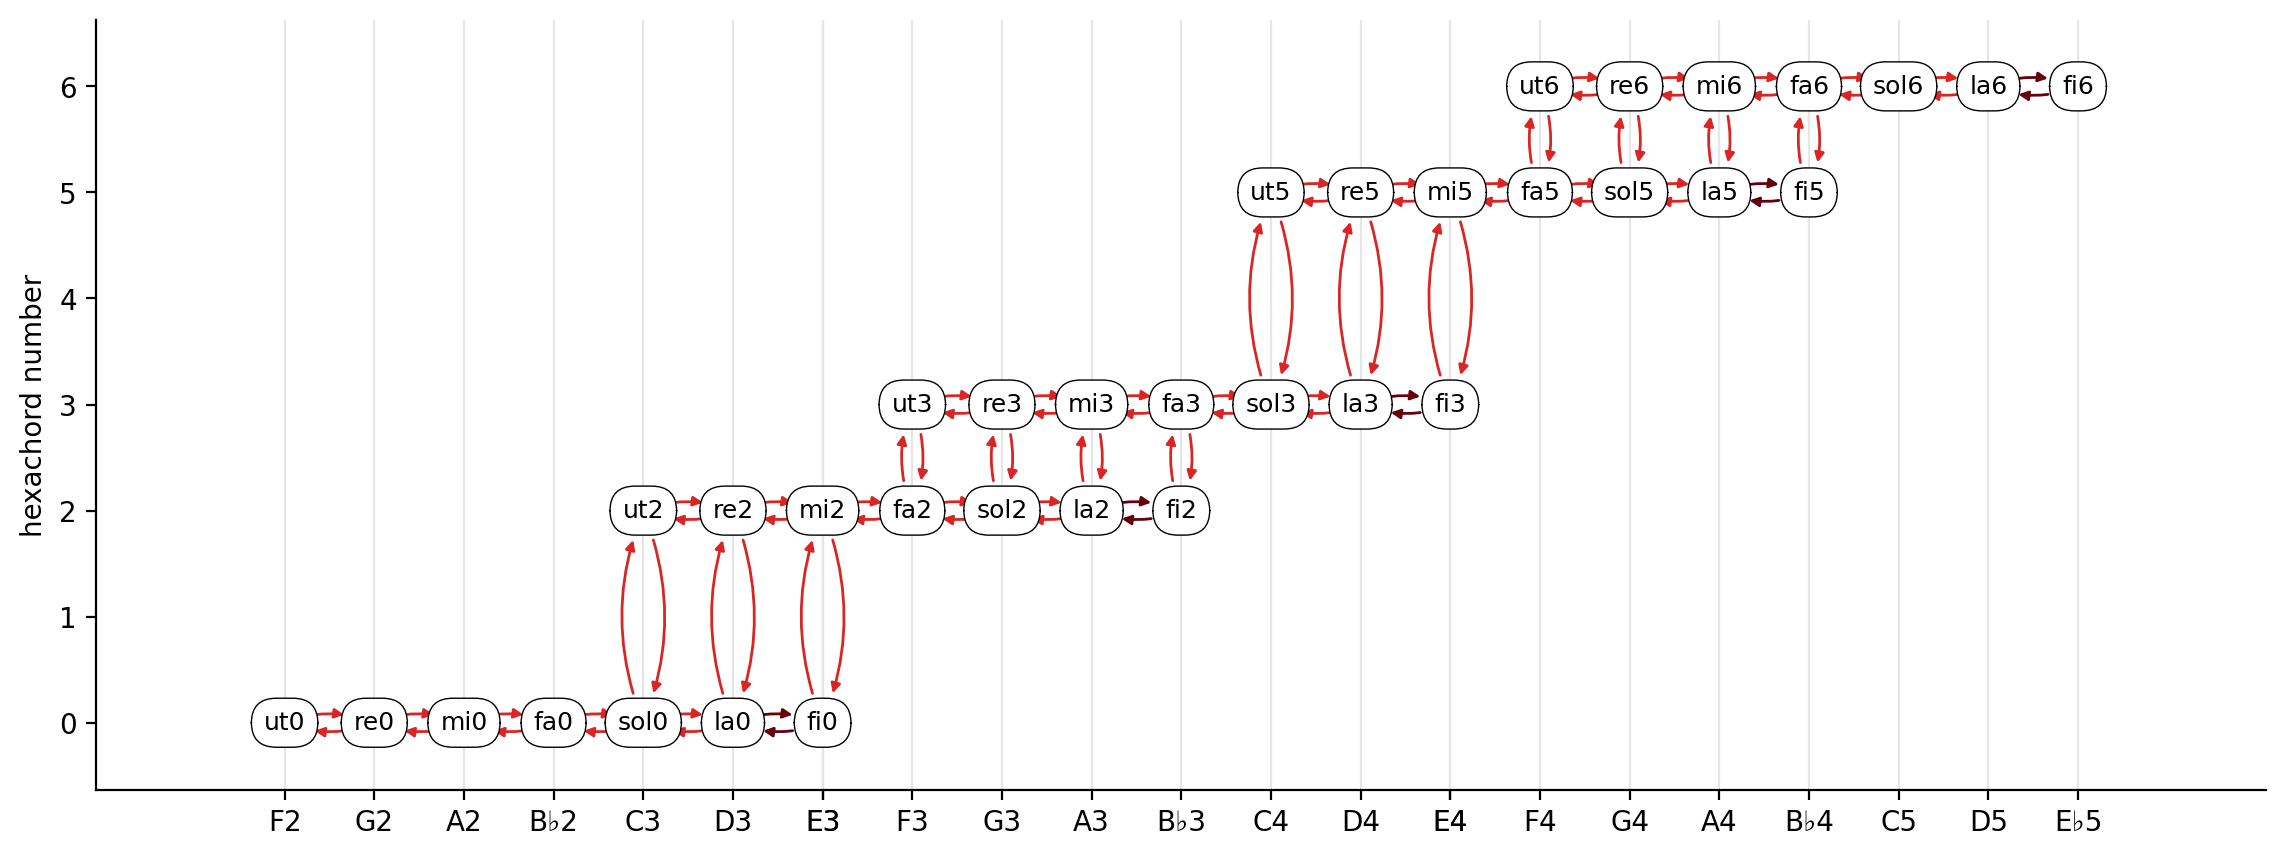

In [23]:
gamut.draw()

In [24]:
seq = [Pitch(p) for p in 'C3 A3'.split(' ')]
sol = solmize(seq, gamut=gamut)

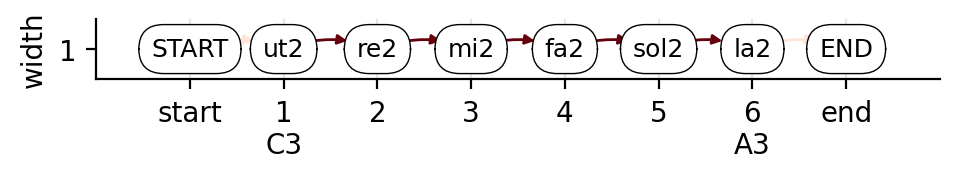

In [25]:
sol.parse.draw()

In [26]:
weights = [1] * 14
weight_dict = dict(zip(hard_gamut_params.keys(), weights))
weight_dict

{'hard_up_nat_fa_ut': 1,
 'hard_up_nat_sol_re': 1,
 'hard_up_nat_la_mi': 1,
 'hard_up_nat_fi_fa': 1,
 'nat_down_hard_ut_fa': 1,
 'nat_down_hard_re_sol': 1,
 'nat_down_hard_mi_la': 1,
 'nat_down_hard_fa_fi': 1,
 'hard_down_nat_ut_sol': 1,
 'hard_down_nat_re_la': 1,
 'hard_down_nat_mi_fi': 1,
 'nat_up_hard_sol_ut': 1,
 'nat_up_hard_la_re': 1,
 'nat_up_hard_fi_mi': 1}